**Training and model generation**

In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import cv2
import glob
import numpy as np

# SIZE = 200

df = pd.read_csv("/content/drive/MyDrive/FINAL PROJECT/COSC 680_FINAL PROJECT/miml_dataset/miml_labels_1.csv")
base_dir = "/content/drive/MyDrive/FINAL PROJECT/COSC 680_FINAL PROJECT/miml_dataset/images/"

X = []
y = []


l = df.shape[0]

for i in range(l):
  image = cv2.imread(base_dir + df['Filenames'][i])
  image = cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
  image = image/255.0
  X.append(image)
  label = (df.loc[i, "desert"], df.loc[i, "mountains"],
                df.loc[i, "sea"], df.loc[i, "sunset"], df.loc[i, "trees"])
  y.append(label)
	
X = np.array(X)
y = np.array(y)

In [ ]:
y.shape

(2000, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from tensorflow.keras.layers import Conv2D

# y = to_categorical(y_tranformed)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.8)

In [ ]:
SIZE = 200

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

In [ ]:
#model.summary()

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.005)

model.compile(optimizer=sgd,loss='binary_crossentropy', metrics=['accuracy']) 

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=15)

Epoch 1/10
107/107 [==============================] - 202s 1s/step - loss: 0.6854 - accuracy: 0.2362 - val_loss: 0.6616 - val_accuracy: 0.1750
Epoch 2/10
107/107 [==============================] - 137s 1s/step - loss: 0.6699 - accuracy: 0.2281 - val_loss: 0.6354 - val_accuracy: 0.2250
Epoch 3/10
107/107 [==============================] - 135s 1s/step - loss: 0.6550 - accuracy: 0.2569 - val_loss: 0.6184 - val_accuracy: 0.3325
Epoch 4/10
107/107 [==============================] - 137s 1s/step - loss: 0.6440 - accuracy: 0.2338 - val_loss: 0.6097 - val_accuracy: 0.3175
Epoch 5/10
107/107 [==============================] - 137s 1s/step - loss: 0.6312 - accuracy: 0.2562 - val_loss: 0.5941 - val_accuracy: 0.3925
Epoch 6/10
107/107 [==============================] - 139s 1s/step - loss: 0.6250 - accuracy: 0.2362 - val_loss: 0.5800 - val_accuracy: 0.3525
Epoch 7/10
107/107 [==============================] - 133s 1s/step - loss: 0.6169 - accuracy: 0.2481 - val_loss: 0.5714 - val_accuracy: 0.3500

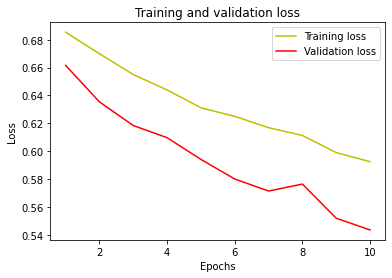

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Showing the prediction output of a few test images (displaying the image and prediction of the classifier)**


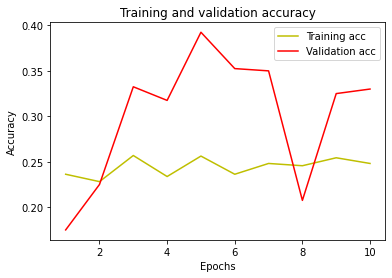

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

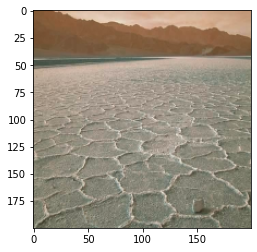

In [ ]:
image = cv2.imread("/content/drive/MyDrive/FINAL PROJECT/COSC 680_FINAL PROJECT/miml_dataset/images/10.jpg")
image = cv2.resize(image, (200,200), interpolation = cv2.INTER_AREA)
image = image/255.0
plt.imshow(image)
image = np.expand_dims(image, axis=0)

In [ ]:
classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(image)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories


1/1 [==============================] - 0s 478ms/step


In [ ]:
#Print classes and corresponding probabilities
for i in range(4):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

sunset (0.391)
mountains (0.351)
trees (0.345)
sea (0.337)


In [ ]:
acc = model.evaluate(X_test, y_test)
print("accuracy = ", (acc * 100), "%")

13/13 [==============================] - 9s 724ms/step - loss: 0.5435 - accuracy: 0.3300
accuracy =  [0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.33000001311302185, 0.5434829592704773, 0.330000013113021